<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Actividad_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTADO TEÓRICO: 0.5556 (exacto)
RESULTADO SIMULADO: 0.5570 (con 100,000 puntos)
Diferencia: 0.0014


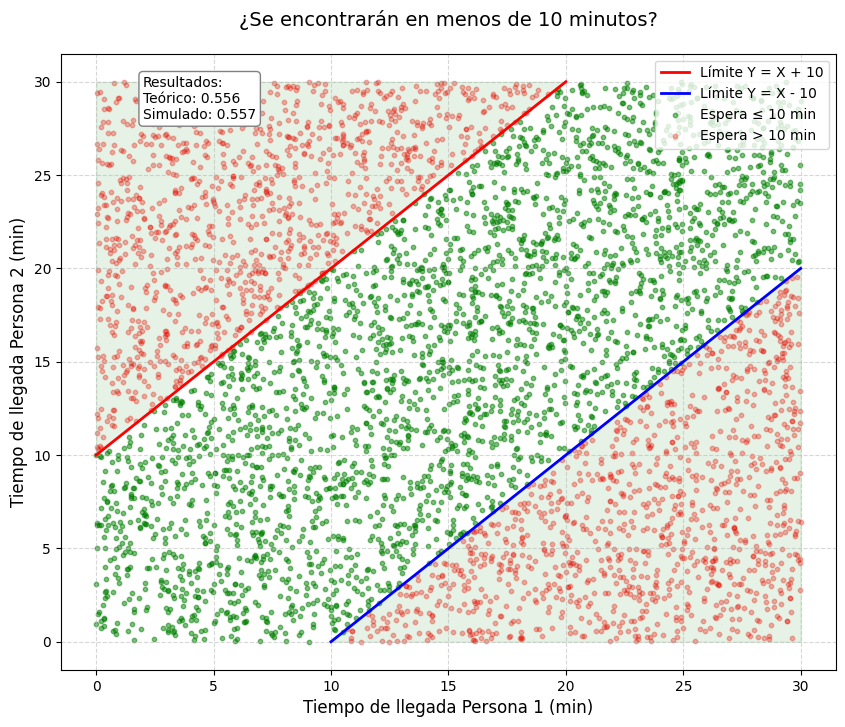

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# CÁLCULO DE PROBABILIDAD (ANALÍTICO Y SIMULACIÓN)

# Primero calculamos la solución exacta con geometría
def prob_teorica():
    # Área total del cuadrado [0,30]x[0,30]
    area_total = 30 * 30

    # Área donde la diferencia es >10 minutos (son dos triángulos)
    # Cada triángulo tiene base=20 y altura=20
    area_fuera = 2 * (20 * 20 / 2)

    # Área donde nos esperan máximo 10 minutos
    area_dentro = area_total - area_fuera

    # Probabilidad = área favorable / área total
    return area_dentro / area_total

# Luego hacemos la simulación con muchos puntos aleatorios
def simular(n=100000):
    # Generamos tiempos de llegada aleatorios para ambas personas
    persona1 = np.random.uniform(0, 30, n)
    persona2 = np.random.uniform(0, 30, n)

    # Calculamos diferencias absolutas de tiempos
    dif = np.abs(persona1 - persona2)

    # Contamos cuántas diferencias son <=10 minutos
    return np.sum(dif <= 10) / n

# Calculamos ambos resultados
teorico = prob_teorica()
simulado = simular()

# Mostramos los resultados comparados
print(f"RESULTADO TEÓRICO: {teorico:.4f} (exacto)")
print(f"RESULTADO SIMULADO: {simulado:.4f} (con 100,000 puntos)")
print(f"Diferencia: {abs(teorico - simulado):.4f}")

#Graficamos con solo una pequeña muestra para evitar saturación

# Usamos 5000 puntos para el gráfico
muestra = 5000
p1 = np.random.uniform(0, 30, muestra)
p2 = np.random.uniform(0, 30, muestra)
dif = np.abs(p1 - p2)

# Separamos los puntos que cumplen y no cumplen
cumplen = dif <= 10
no_cumplen = dif > 10

# Configuramos el gráfico
plt.figure(figsize=(10, 8))

# Dibujamos las líneas críticas
plt.plot([0, 20], [10, 30], 'r-', linewidth=2, label='Límite Y = X + 10')
plt.plot([10, 30], [0, 20], 'b-', linewidth=2, label='Límite Y = X - 10')

# Pintamos los puntos
plt.scatter(p1[cumplen], p2[cumplen], color='green', s=10, alpha=0.5, label='Espera ≤ 10 min')
plt.scatter(p1[no_cumplen], p2[no_cumplen], color='red', s=10, alpha=0.3, label='Espera > 10 min')

# Rellenamos las áreas importantes
plt.fill_between([0, 20], [10, 30], [30, 30], color='green', alpha=0.1)
plt.fill_between([10, 30], [0, 20], [0, 0], color='green', alpha=0.1)

# Añadimos detalles al gráfico
plt.title('¿Se encontrarán en menos de 10 minutos?', fontsize=14, pad=20)
plt.xlabel('Tiempo de llegada Persona 1 (min)', fontsize=12)
plt.ylabel('Tiempo de llegada Persona 2 (min)', fontsize=12)
plt.xticks(np.arange(0, 31, 5))
plt.yticks(np.arange(0, 31, 5))
plt.grid(linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=10)

# Mostramos los resultados en el gráfico
resultados = f'Resultados:\nTeórico: {teorico:.3f}\nSimulado: {simulado:.3f}'
plt.text(2, 28, resultados, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'), fontsize=10)

plt.show()

1. Resultado teórico (55.56%)

Es el cálculo exacto usando matemáticas (geometría).

Significa que en teoría, hay un 55.56% de probabilidad de que las dos personas lleguen con menos de 10 minutos de diferencia.


2. Resultado simulado (55.70%)

Es lo que obtuvo el programa al generar 100,000 casos aleatorios.
Prácticamente igual al teórico (solo 0.14% de diferencia).
Confirma que la simulación funciona bien.

\\

**Ambos métodos muestran que hay 55.5% de probabilidad de que la espera sea ≤10 minutos. La mínima diferencia (0.14%) es normal y no cambia el resultado.**